In [1]:
cd ..

/home/tommy/Scrivania/Polimi/Honours Programme/SCFR


In [2]:
from games.permutation import *
from data_structures.trees import *
from utilities.drawing import draw_tree
from data_structures.cfr_trees import CFRTree, CFRJointStrategy, CFRNode
from cfr_code.reconstruction_cfr import SolveWithReconstructionCFR
from cfr_code.sample_cfr import SolveWithSampleCFR
from cfr_code.cfr import SolveWithCFR
import ast
from utilities.graphs import epsilon_graph, comparative_epsilon_graph

In [3]:
%load_ext autoreload
%autoreload 2

# 2 Players

In [151]:
tree = Tree()

In [152]:
n1 = tree.addNode(1, 1, tree.root)
n2 = tree.addNode(1, 1, tree.root)
n3 = tree.addNode(1, 1, tree.root)

In [153]:
tree.addLeaf(n1, [1, 0])
tree.addLeaf(n1, [0, 1])
tree.addLeaf(n1, [0, 0])
tree.addLeaf(n2, [0, 0])
tree.addLeaf(n2, [2, 0])
tree.addLeaf(n2, [0, 1])
tree.addLeaf(n3, [0, 1])
tree.addLeaf(n3, [0, 0])
tree.addLeaf(n3, [1, 0])

Leaf12 (children of Node3 via Action 1.2) -  utility is [1, 0]

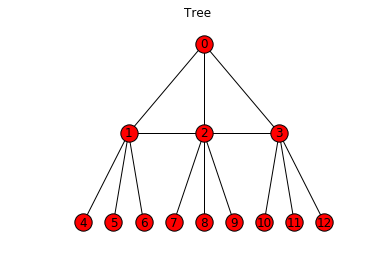

In [154]:
draw_tree(tree)

In [155]:
res_cfr = SolveWithCFR(CFRTree(tree), 10000, checkEveryIteration = 1, show_perc = True)
res_rcfr = SolveWithReconstructionCFR(CFRTree(tree), 10000, reconstructEveryIteration = 1, 
                                      checkEveryIteration = 1, show_perc = True)
res_scfr = SolveWithSampleCFR(CFRTree(tree), 10000, checkEveryIteration = 1, show_perc = True)

10.0%
20.0%
30.0%
40.0%
50.0%
60.0%
70.0%
80.0%
90.0%
100.0%
10.0%
20.0%
30.0%
40.0%
50.0%
60.0%
70.0%
80.0%
90.0%
100.0%
10.0%
20.0%
30.0%
40.0%
50.0%
60.0%
70.0%
80.0%
90.0%
100.0%


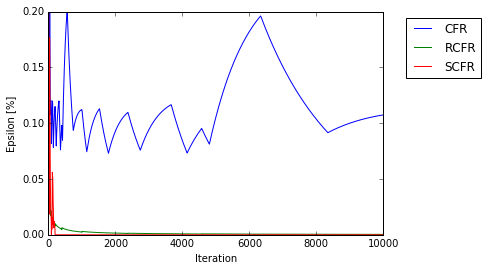

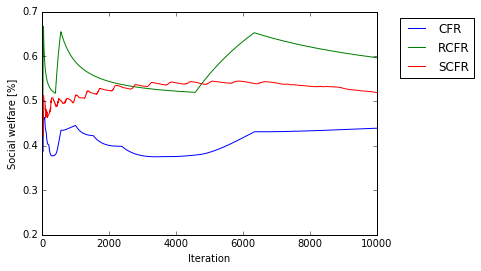

In [157]:
comparative_epsilon_graph([res_cfr, res_rcfr, res_scfr], legend = ['CFR', 'RCFR', 'SCFR'],
                          delta_utility = 2, ylims = (0, 0.2))
comparative_epsilon_graph([res_cfr, res_rcfr, res_scfr], legend = ['CFR', 'RCFR', 'SCFR'],
                          delta_utility = 2, max_social_welfare = 2, yaxis = 'social_welfare')

# 3 Players

In [4]:
tree = Tree(3)

for a in range(3):
    n1 = tree.addNode(1, 1, tree.root)
    
    for b in range(3):
        n2 = tree.addNode(2, 2, n1)
        
        for c in range(3):
            u =  [0 for _ in range(3)]
            u[(a + b + c) % 3] = 1
            l = tree.addLeaf(n2, u)

In [132]:
tree = Tree(3)

# -------------------------------------------------------------

n1 = tree.addNode(1, 1, tree.root)
n2 = tree.addNode(1, 5, tree.root)
n3 = tree.addNode(1, 6, tree.root)

# -------------------------------------------------------------

n11 = tree.addNode(2, 2, n1)
n12 = tree.addNode(2, 2, n1)
n13 = tree.addNode(2, 2, n1)
n21 = tree.addNode(2, 3, n2)
n22 = tree.addNode(2, 3, n2)
n23 = tree.addNode(2, 3, n2)
n31 = tree.addNode(2, 4, n3)
n32 = tree.addNode(2, 4, n3)
n33 = tree.addNode(2, 4, n3)

# -------------------------------------------------------------

tree.addLeaf(n11, [1, 0, 0])
tree.addLeaf(n11, [0, 1, 0])
tree.addLeaf(n11, [0, 0, 1])

tree.addLeaf(n12, [0, 1, 0])
tree.addLeaf(n12, [0, 0, 2])
tree.addLeaf(n12, [1, 0, 0])

tree.addLeaf(n13, [0, 0, 1])
tree.addLeaf(n13, [1, 0, 0])
tree.addLeaf(n13, [0, 1, 0])



tree.addLeaf(n21, [0, 1, 0])
tree.addLeaf(n21, [0, 0, 1])
tree.addLeaf(n21, [1, 0, 0])

tree.addLeaf(n22, [0, 0, 1])
tree.addLeaf(n22, [2, 0, 0])
tree.addLeaf(n22, [0, 1, 0])

tree.addLeaf(n23, [1, 0, 0])
tree.addLeaf(n23, [0, 1, 0])
tree.addLeaf(n23, [0, 0, 1])



tree.addLeaf(n31, [0, 0, 1])
tree.addLeaf(n31, [1, 0, 0])
tree.addLeaf(n31, [0, 1, 0])

tree.addLeaf(n32, [1, 0, 0])
tree.addLeaf(n32, [0, 2, 0])
tree.addLeaf(n32, [0, 0, 1])

tree.addLeaf(n33, [0, 1, 0])
tree.addLeaf(n33, [0, 0, 1])
tree.addLeaf(n33, [1, 0, 0])

Leaf39 (children of Node12 via Action 4.2) -  utility is [1, 0, 0]

In [111]:
for (a, n1) in enumerate(tree.root.children):
    for (b, n2) in enumerate(n1.children):
        for (c, l) in enumerate(n2.children):
            l.utility = [u + 100 * (a - 1) + 10 * (b - 1) + 200 * u for u in l.utility]

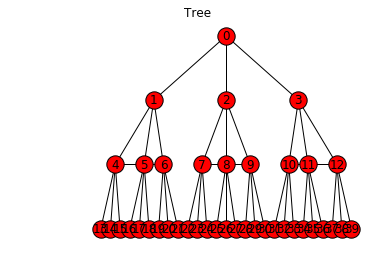

In [133]:
draw_tree(tree)

In [134]:
ct_cfr = CFRTree(tree)
res_cfr = SolveWithCFR(ct_cfr, 5000, checkEveryIteration = 5, show_perc = True)
ct_rcfr = CFRTree(tree)
res_rcfr = SolveWithReconstructionCFR(ct_rcfr, 5000, reconstructEveryIteration = 5, 
                                      checkEveryIteration = 5, show_perc = True)
ct_scfr = CFRTree(tree)
res_scfr = SolveWithSampleCFR(ct_scfr, 5000, checkEveryIteration = 5, show_perc = True)

10.0%
20.0%
30.0%
40.0%
50.0%
60.0%
70.0%
80.0%
90.0%
100.0%
10.0%
20.0%
30.0%
40.0%
50.0%
60.0%
70.0%
80.0%
90.0%
100.0%
10.0%
20.0%
30.0%
40.0%
50.0%
60.0%
70.0%
80.0%
90.0%
100.0%


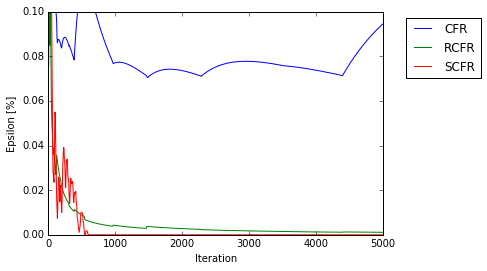

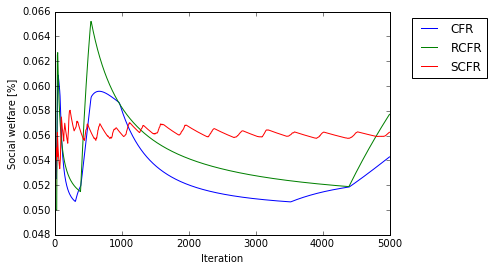

In [135]:
comparative_epsilon_graph([res_cfr, res_rcfr, res_scfr], legend = ['CFR', 'RCFR', 'SCFR'],
                          delta_utility = 2, ylims = (0, 0.1))
comparative_epsilon_graph([res_cfr, res_rcfr, res_scfr], legend = ['CFR', 'RCFR', 'SCFR'],
                          delta_utility = 2, yaxis = "social_welfare", max_social_welfare = 20)

In [99]:
res_cfr["graph_data"][-1]

{'duration': 0.0016155242919921875,
 'epsilon': [-0.01994816477466088,
  -0.0018785202494200348,
  -0.000133279681165277],
 'iteration_number': 5000,
 'utility': [109.97817039507773, 109.97824013848438, 110.97756889160117]}

In [104]:
ct_rcfr.root.information_set.getAverageStrategy()
ct_rcfr.root.children[2].information_set.getAverageStrategy()
ct_rcfr.root.children[2].children[2].information_set.getAverageStrategy()

[6.666666666666667e-05, 0.9998666666666667, 6.666666666666667e-05]

---

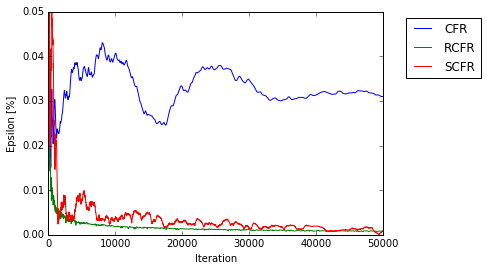

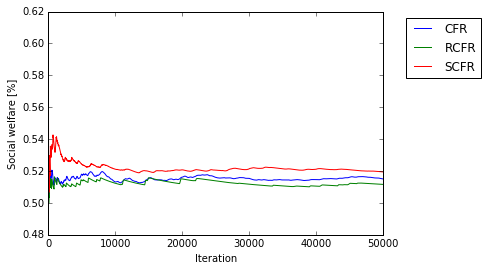

In [149]:
comparative_epsilon_graph([res_cfr, res_rcfr, res_scfr], legend = ['CFR', 'RCFR', 'SCFR'],
                          delta_utility = 2, ylims = (0, 0.05))
comparative_epsilon_graph([res_cfr, res_rcfr, res_scfr], legend = ['CFR', 'RCFR', 'SCFR'],
                          delta_utility = 2, yaxis = "social_welfare", max_social_welfare = 2)

---

# Notes

### Variants of Shapley game that works

* Paper variant (a 2 in the utility in the middle outcome)
* 3 player extensive-form generalization (with "rotating" outcomes)
* 3 player version with player 2 with perfect information
* 3 player version with a 2 in the utility in each middle outcome
* 3 player version with a perfect information player 2 and 3 infosets for player 3
* 4 player version with 4 non-standard outcomes

### Variants of Shapley game that do not work (i.e. cfr converges)

* 3 player perfect-information variant
* "coordination games" version
* "smoothed" version

### Smoothness

Seems that in "smooth" versions of the extensive-form 3-player Shapley game cfr is able to converge and to minimize epsilon. This variants are built by making utility vector more distant (in l2 norm) if they are descendant of deviations higher up in the tree.

This may suggest that cfr is able to converge to something (to be clarified) even in multiplayer general-sum game, provided they are "smooth" in the sense descripted above.

###### Note: this may be all false

---

# 4 Players

In [81]:
tree = Tree(4)

for a in range(4):
    n1 = tree.addNode(1, 1, tree.root)
    
    for b in range(4):
        n2 = tree.addNode(2, 2, n1)
        
        for c in range(4):
            n3 = tree.addNode(3, 3, n2)
            
            for d in range(4):
                u =  [0 for _ in range(4)]
                u[(a + b + c + d) % 4] = 1
                
                v = [a, b, c, d]
                if a == b and b == c and d == 0:
                    u[(a + b + c + d) % 4] = 2
                
                l = tree.addLeaf(n3, u)

In [61]:
tree.root.children[1].children[1].children[1].children[1].utility = [2, 0, 0, 0]
tree.root.children[2].children[2].children[2].children[2].utility = [2, 0, 0, 0]

In [85]:
tree.root.children[2].children[2].children[2].children[0].utility

[0, 0, 2, 0]

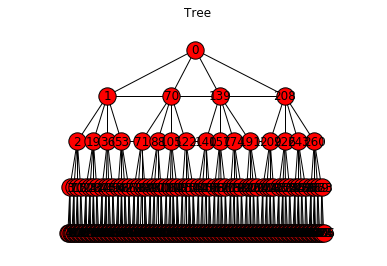

In [50]:
draw_tree(tree)

In [89]:
ct_cfr = CFRTree(tree)
res_cfr = SolveWithCFR(ct_cfr, 5000, checkEveryIteration = 5, show_perc = True)
ct_rcfr = CFRTree(tree)
res_rcfr = SolveWithReconstructionCFR(ct_rcfr, 5000, reconstructEveryIteration = 5, 
                                      checkEveryIteration = 5, show_perc = True)
ct_scfr = CFRTree(tree)
res_scfr = SolveWithSampleCFR(ct_scfr, 5000, checkEveryIteration = 5, show_perc = True)

10.0%
20.0%
30.0%
40.0%
50.0%
60.0%
70.0%
80.0%
90.0%
100.0%
10.0%
20.0%
30.0%
40.0%
50.0%
60.0%
70.0%
80.0%
90.0%
100.0%
10.0%
20.0%
30.0%
40.0%
50.0%
60.0%
70.0%
80.0%
90.0%
100.0%


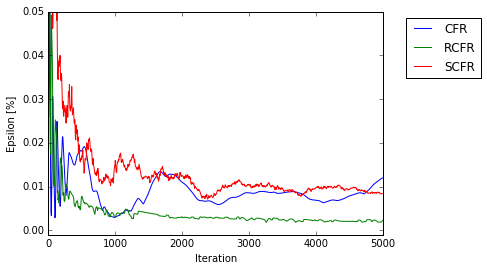

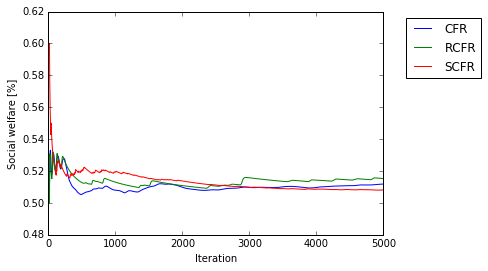

In [90]:
comparative_epsilon_graph([res_cfr, res_rcfr, res_scfr], legend = ['CFR', 'RCFR', 'SCFR'],
                          delta_utility = 2, ylims = (-0.001, 0.05))
comparative_epsilon_graph([res_cfr, res_rcfr, res_scfr], legend = ['CFR', 'RCFR', 'SCFR'],
                          delta_utility = 2, yaxis = "social_welfare", max_social_welfare = 2)

In [91]:
res_cfr['graph_data'][-1]

{'duration': 0.01476597785949707,
 'epsilon': [-0.02411557621630883,
  -0.011498043784787304,
  -0.014628880076378248,
  -0.0029533320577018185],
 'iteration_number': 5000,
 'utility': [0.2586404713469337,
  0.2532648501936875,
  0.2597912979831365,
  0.25192961778654843]}

---

# 2 players modified shapley game (3 levels)

### Rules

* Player 1 plays one of three cards
* Player 2 observes it and plays one of three cards (hidden)
* Player 1 plays one of three cards
* The utility is determined by the sum of the 3 played cards
    * if the sum is 0 mod 3, the utility is [0, 0]
    * if the sum is 1 mod 3, the utility is [1, 0]
    * if the sum is 2 mod 3, the utility is [0, 1]
* if the first two cards played are equal, then the utility is doubled

In [4]:
tree = Tree(2)

# -------------------------------------------------------------

n1 = tree.addNode(1, 1, tree.root)
n2 = tree.addNode(1, 5, tree.root)
n3 = tree.addNode(1, 6, tree.root)

# -------------------------------------------------------------

n11 = tree.addNode(0, 2, n1)
n12 = tree.addNode(0, 2, n1)
n13 = tree.addNode(0, 2, n1)
n21 = tree.addNode(0, 3, n2)
n22 = tree.addNode(0, 3, n2)
n23 = tree.addNode(0, 3, n2)
n31 = tree.addNode(0, 4, n3)
n32 = tree.addNode(0, 4, n3)
n33 = tree.addNode(0, 4, n3)

# -------------------------------------------------------------

tree.addLeaf(n11, [1, 0])
tree.addLeaf(n11, [0, 1])
tree.addLeaf(n11, [0, 0])

tree.addLeaf(n12, [0, 1])
tree.addLeaf(n12, [0, 0])
tree.addLeaf(n12, [1, 0])

tree.addLeaf(n13, [0, 0])
tree.addLeaf(n13, [1, 0])
tree.addLeaf(n13, [0, 1])



tree.addLeaf(n21, [0, 1])
tree.addLeaf(n21, [0, 0])
tree.addLeaf(n21, [1, 0])

tree.addLeaf(n22, [0, 0])
tree.addLeaf(n22, [2, 0])
tree.addLeaf(n22, [0, 1])

tree.addLeaf(n23, [1, 0])
tree.addLeaf(n23, [0, 1])
tree.addLeaf(n23, [0, 0])



tree.addLeaf(n31, [0, 0])
tree.addLeaf(n31, [1, 0])
tree.addLeaf(n31, [0, 1])

tree.addLeaf(n32, [1, 0])
tree.addLeaf(n32, [0, 1])
tree.addLeaf(n32, [0, 0])

tree.addLeaf(n33, [0, 1])
tree.addLeaf(n33, [0, 0])
tree.addLeaf(n33, [1, 0])

Leaf39 (children of Node12 via Action 4.2) -  utility is [1, 0]

In [5]:
tree = Tree(2)

for a in range(3):
    n1 = tree.addNode(1, a + 1, tree.root)
    
    for b in range(3):
        n2 = tree.addNode(0, a + 4, n1)
        
        for c in range(3):
            
            index = (a + b + c + 2) % 3
            
            u =  [0 for _ in range(2)]
            
            if index < 2:
                u[index] = 2

            if a == b and index < 2:
                u[index] = 1
                
            #print("Sum is " + str(a + b + c) + " and util is " + str(u))
            
            #if max(u) == 0:
            #    u = [-5, -5]

            l = tree.addLeaf(n2, u)

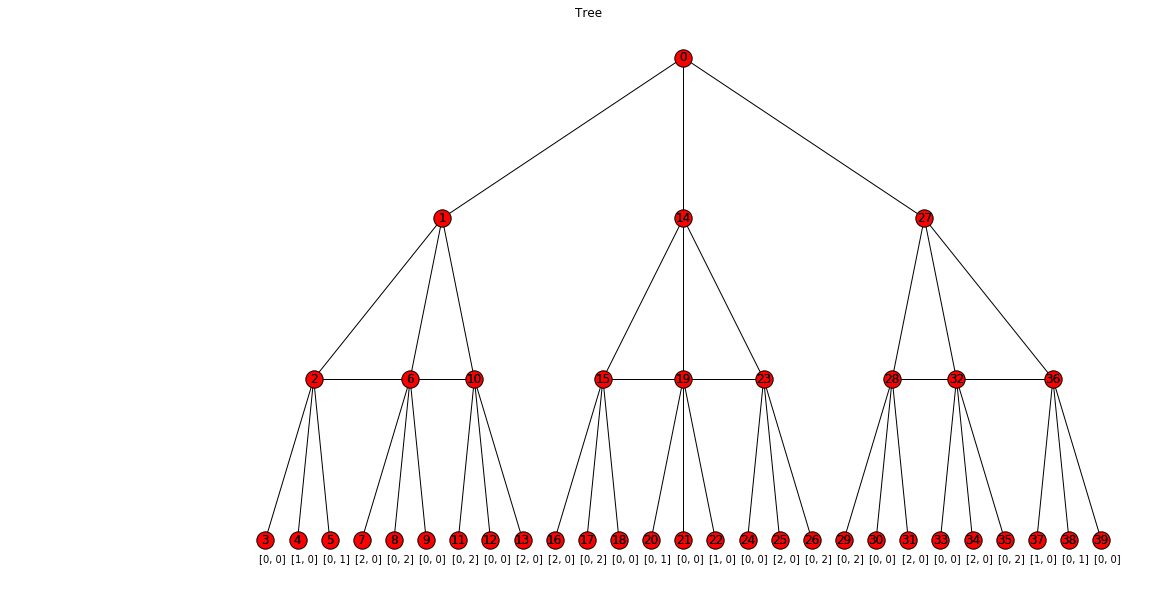

In [6]:
draw_tree(tree)

In [7]:
ct_cfr = CFRTree(tree)
res_cfr = SolveWithCFR(ct_cfr, 150000, checkEveryIteration = 5, show_perc = True)
ct_rcfr = CFRTree(tree)
res_rcfr = SolveWithReconstructionCFR(ct_rcfr, 150000, reconstructEveryIteration = 5, 
                                      checkEveryIteration = 5, show_perc = True)
ct_scfr = CFRTree(tree)
res_scfr = SolveWithSampleCFR(ct_scfr, 150000, checkEveryIteration = 5, show_perc = True)

10.0%
20.0%
30.0%
40.0%
50.0%
60.0%
70.0%
80.0%
90.0%
100.0%
10.0%
20.0%
30.0%
40.0%
50.0%
60.0%
70.0%
80.0%
90.0%
100.0%
10.0%
20.0%
30.0%
40.0%
50.0%
60.0%
70.0%
80.0%
90.0%
100.0%


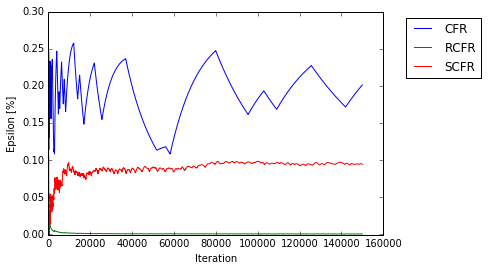

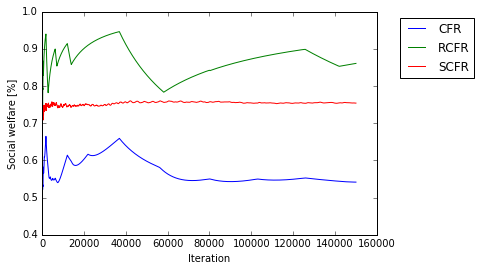

In [8]:
comparative_epsilon_graph([res_cfr, res_rcfr, res_scfr], legend = ['CFR', 'RCFR', 'SCFR'],
                          delta_utility = 2, ylims = (-0.001, 0.3))
comparative_epsilon_graph([res_cfr, res_rcfr, res_scfr], legend = ['CFR', 'RCFR', 'SCFR'],
                          delta_utility = 2, yaxis = "social_welfare", max_social_welfare = 2)

In [17]:
import json
def res_to_file(res, filename):
    results_file = open(filename, "w+")
    results_file.write(json.dumps({"data": res['graph_data']}))
    results_file.close()

In [19]:
res_to_file(res_cfr, 'results/shapley/shapley_game_cfr')
res_to_file(res_scfr, 'results/shapley/shapley_game_scfr')
res_to_file(res_rcfr, 'results/shapley/shapley_game_rcfr')

In [20]:
for i in range(10):
    ct_scfr = CFRTree(tree)
    res_scfr = SolveWithSampleCFR(ct_scfr, 150000, checkEveryIteration = 5, show_perc = True)
    res_to_file(res_scfr, 'results/shapley/shapley_game_scfr_' + str(i))

10.0%
20.0%
30.0%
40.0%
50.0%
60.0%
70.0%
80.0%
90.0%
100.0%
10.0%
20.0%
30.0%
40.0%
50.0%
60.0%
70.0%
80.0%
90.0%
100.0%
10.0%
20.0%
30.0%
40.0%
50.0%
60.0%
70.0%
80.0%
90.0%
100.0%
10.0%
20.0%
30.0%
40.0%
50.0%
60.0%
70.0%
80.0%
90.0%
100.0%
10.0%
20.0%
30.0%
40.0%
50.0%
60.0%
70.0%
80.0%
90.0%
100.0%
10.0%
20.0%
30.0%
40.0%
50.0%
60.0%
70.0%
80.0%
90.0%
100.0%
10.0%
20.0%
30.0%
40.0%
50.0%
60.0%
70.0%
80.0%
90.0%
100.0%
10.0%
20.0%
30.0%
40.0%
50.0%
60.0%
70.0%
80.0%
90.0%
100.0%
10.0%
20.0%
30.0%
40.0%
50.0%
60.0%
70.0%
80.0%
90.0%
100.0%
10.0%
20.0%
30.0%
40.0%
50.0%
60.0%
70.0%
80.0%
90.0%
100.0%


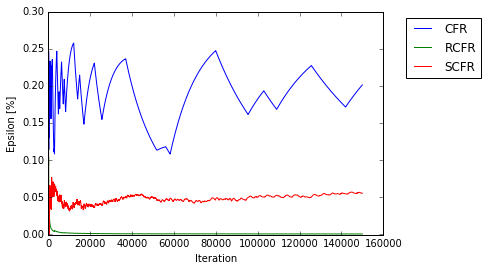

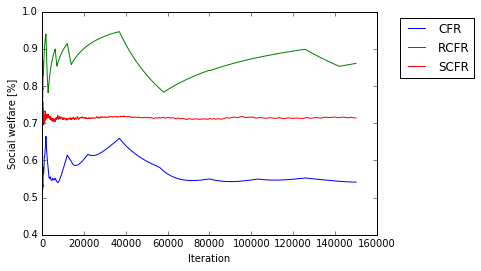

In [49]:
comparative_epsilon_graph([res_cfr, res_rcfr, res_scfr], legend = ['CFR', 'RCFR', 'SCFR'],
                          delta_utility = 2, ylims = (-0.001, 0.3))
comparative_epsilon_graph([res_cfr, res_rcfr, res_scfr], legend = ['CFR', 'RCFR', 'SCFR'],
                          delta_utility = 2, yaxis = "social_welfare", max_social_welfare = 2)

#### RCFR reached outcomes

In [42]:
for (p, v) in res_rcfr['joint'].plans.items():
    f = v / res_rcfr['joint'].frequencyCount
    ap = CFRJointStrategy.stringToActionPlan(p)
    
    a1 = ap[0]
    a2 = ap[tree.root.children[a1].information_set]
    a3 = ap[tree.root.children[a1].children[a2].information_set]
    if f > 0.01:
        print(([a1, a2, a3], f, tree.root.children[a1].children[a2].children[a3].utility))

([1, 0, 0], 0.08075477695783763, [2, 0])
([2, 0, 0], 0.2257570044716157, [0, 2])
([1, 1, 0], 0.10326899577603449, [0, 1])
([2, 0, 2], 0.21388130283830178, [2, 0])
([2, 2, 0], 0.018217934047124292, [1, 0])
([2, 2, 1], 0.013895918965760212, [0, 1])
([2, 1, 1], 0.034900611522799975, [2, 0])
([1, 0, 1], 0.033751585580743315, [0, 2])
([0, 2, 2], 0.08075477695783763, [2, 0])
([0, 0, 2], 0.10326899577603449, [0, 1])
([0, 2, 0], 0.033751585580743315, [0, 2])


#### SCFR reached outcomes

In [43]:
for (p, v) in res_scfr['joint'].plans.items():
    f = v / res_scfr['joint'].frequencyCount
    ap = CFRJointStrategy.stringToActionPlan(p)
    
    a1 = ap[0]
    a2 = ap[tree.root.children[a1].information_set]
    a3 = ap[tree.root.children[a1].children[a2].information_set]
    if f > 0.01:
        print(([a1, a2, a3], f, tree.root.children[a1].children[a2].children[a3].utility))

([1, 0, 0], 0.01764095468695953, [2, 0])
([2, 1, 1], 0.015565548253199585, [2, 0])
([0, 2, 2], 0.012798339674852992, [2, 0])
([2, 2, 0], 0.01176063645797302, [1, 0])
([1, 0, 0], 0.014527845036319613, [2, 0])
([2, 1, 1], 0.019024558976132824, [2, 0])
([2, 2, 0], 0.027326184711172603, [1, 0])
([1, 0, 0], 0.011414735385679695, [2, 0])
([2, 2, 0], 0.010031131096506399, [1, 0])
([0, 0, 2], 0.012798339674852992, [0, 1])
([2, 1, 1], 0.025942580421999307, [2, 0])
([2, 0, 2], 0.011068834313386372, [2, 0])
([2, 2, 1], 0.02698028363887928, [0, 1])
([1, 1, 0], 0.015219647180906262, [0, 1])
([0, 0, 2], 0.02525077827741266, [0, 1])
([2, 1, 1], 0.01764095468695953, [2, 0])
([1, 0, 0], 0.02455897613282601, [2, 0])
([2, 2, 1], 0.02455897613282601, [0, 1])
([2, 0, 0], 0.010722933241093047, [0, 2])
([0, 2, 2], 0.02040816326530612, [2, 0])
([0, 2, 2], 0.012106537530266344, [2, 0])
([0, 2, 2], 0.012452438602559669, [2, 0])
([2, 1, 2], 0.013144240747146317, [0, 2])
([0, 0, 2], 0.011414735385679695, [0, 1])


#### CFR reached outcomes

In [44]:
for a1 in range(3):
    s1 = ct_cfr.root.information_set.getAverageStrategy()
    for a2 in range(3):
        s2 = ct_cfr.root.children[a1].information_set.getAverageStrategy()
        for a3 in range(3):
            s3 = ct_cfr.root.children[a1].children[a2].information_set.getAverageStrategy()
            prob = s1[a1] * s2[a2] * s3[a3]
            if prob > 0.01:
                print(([a1, a2, a3], prob, tree.root.children[a1].children[a2].children[a3].utility))

([0, 0, 0], 0.030434207541625583, [0, 0])
([0, 0, 2], 0.126084657609166, [0, 1])
([0, 1, 2], 0.014766676351505003, [0, 0])
([0, 2, 0], 0.010471398955336466, [0, 2])
([0, 2, 2], 0.04338153869019902, [2, 0])
([1, 0, 0], 0.04338153869019901, [2, 0])
([1, 0, 1], 0.010471398955336464, [0, 2])
([1, 1, 0], 0.126084657609166, [0, 1])
([1, 1, 1], 0.03043420754162558, [0, 0])
([1, 2, 0], 0.014766676351505002, [0, 0])
([2, 0, 0], 0.10975563598683251, [0, 2])
([2, 0, 1], 0.023781450496421407, [0, 0])
([2, 0, 2], 0.10037035862324405, [2, 0])
([2, 1, 0], 0.015409517321299663, [0, 0])
([2, 1, 2], 0.01409183925584917, [0, 2])
([2, 2, 0], 0.11949176319358067, [1, 0])
([2, 2, 1], 0.02589103899374396, [0, 1])
([2, 2, 2], 0.10927394312308764, [0, 0])


In [45]:
res_rcfr['utility']

[0.8929216885116336, 0.8553185717442877]

In [46]:
res_cfr['utility']

[0.5291957200317688, 0.5710377331541403]